Judul : Project Klasifikasi Cuaca

Nama : Mutiara Zhavira

NIM  : A11.2022.14676

Kelp : A11.4413

Proyek klasifikasi cuaca ini bertujuan untuk mengembangkan sistem yang dapat mengklasifikasikan kondisi cuaca berdasarkan data meteorologi yang ada. Dengan menggunakan teknik pembelajaran mesin, khususnya algoritma klasifikasi, sistem ini akan dilatih untuk mengenali pola dalam data cuaca dan mengkategorikan kondisi cuaca seperti cerah, berawan, hujan, atau badai.

**Permasalahan**

1.   Ketersediaan Data Berkualitas, Data meteorologi yang berkualitas tinggi dan terperinci sangat penting untuk melatih model klasifikasi. Tantangan muncul jika data yang tersedia tidak lengkap, tidak akurat, atau tidak representatif.
2.   Variabilitas Cuaca, Cuaca sangat bervariasi tergantung pada lokasi geografis dan waktu. Ini menambah kompleksitas dalam pembuatan model yang dapat diandalkan di berbagai kondisi.
3.  Kompleksitas Fitur,Faktor-faktor seperti suhu, kelembapan, tekanan udara, kecepatan angin, dan parameter lainnya memiliki hubungan yang kompleks. Menentukan fitur yang relevan dan menyaring yang tidak relevan adalah tantangan tersendiri.
4.  Perubahan iklim menyebabkan pola cuaca yang tidak terduga dan ekstrem, yang dapat mengganggu prediksi model yang didasarkan pada data historis.


**Tujuan yang Akan Dicapai**
1.   Akurasi Tinggi dalam Prediksi Cuaca,Mengembangkan model yang mampu mengklasifikasikan kondisi cuaca dengan akurasi yang tinggi berdasarkan data yang tersedia.
2.   Pemantauan dan Analisis Cuaca yang Lebih Baik yang Memungkinkan para ilmuwan dan meteorolog untuk memantau dan menganalisis pola cuaca dengan lebih efektif, membantu dalam penelitian ilmiah dan prakiraan cuaca.
3.  Peningkatan Sistem Peringatan Dini, Mendukung sistem peringatan dini cuaca ekstrem untuk mengurangi dampak bencana alam terhadap masyarakat.
4.  Penerapan Teknologi di Berbagai Sektor Menggunakan hasil klasifikasi cuaca untuk berbagai aplikasi seperti pertanian, penerbangan, transportasi, dan energi untuk meningkatkan efisiensi dan keselamatan.












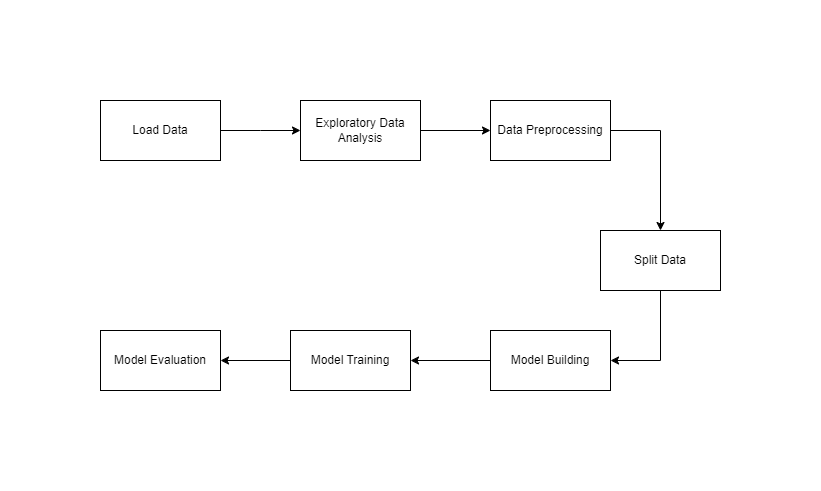

Import Library yang diperlukan untuk analisis dan pembangunan model.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler

from tensorflow.keras.regularizers import L2
from tensorflow.keras.optimizers import Adam , SGD
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

Memuat data dari file weather_classification_data.csv dan menampilkan 5 baris pertama untuk inspeksi awal.

In [ ]:
data = pd.read_csv("weather_classification_data.csv")

In [ ]:
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


Menampilkan informasi umum tentang dataset, termasuk jumlah nilai non-null dan tipe data setiap kolom.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


Memberikan statistik deskriptif dari dataset.

In [ ]:
print("\nStatistics of numerical variables:")
data.describe()


Statistics of numerical variables:


,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [ ]:
print("\nSummary of categorical variables:")
data.describe(include=['object', 'category'])


Summary of categorical variables:


,Cloud Cover,Season,Location,Weather Type
count,13200,13200,13200,13200
unique,4,4,3,4
top,overcast,Winter,inland,Rainy
freq,6090,5610,4816,3300


In [ ]:
numerical_columns = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
                     'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
categorical_columns = ['Cloud Cover', 'Season', 'Location']

Visualisasi Data

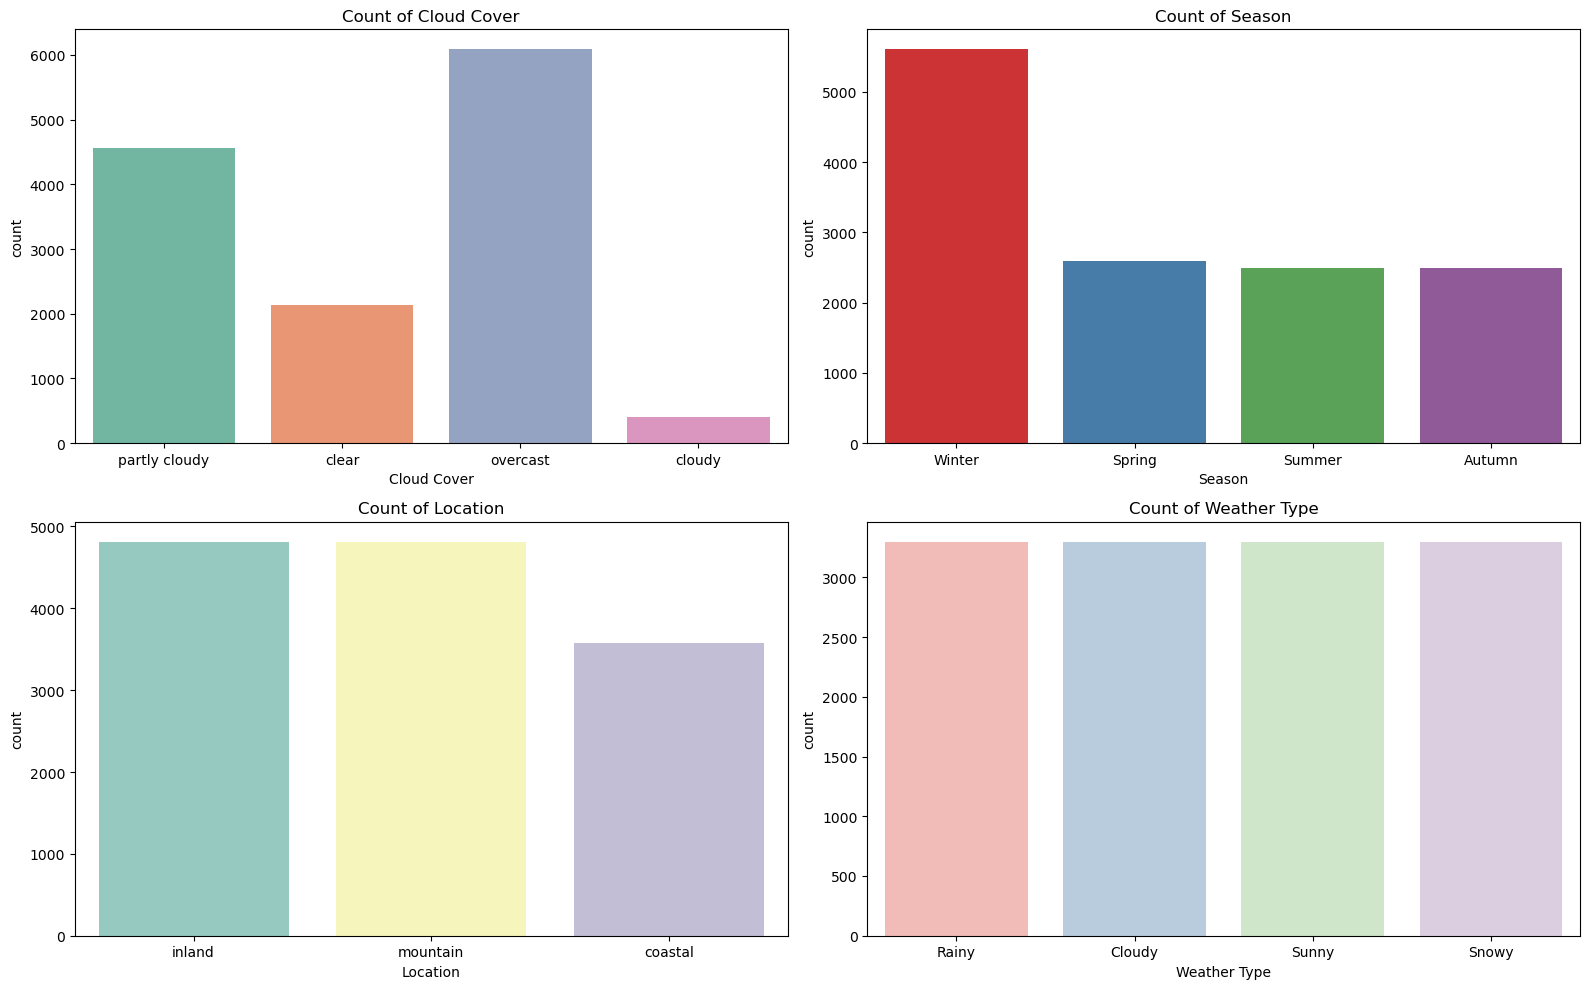

In [ ]:
# Visualization of each categorical feature
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='Cloud Cover', data=data, palette='Set2')
plt.title('Count of Cloud Cover')

plt.subplot(2, 2, 2)
sns.countplot(x='Season', data=data, palette='Set1')
plt.title('Count of Season')

plt.subplot(2, 2, 3)
sns.countplot(x='Location', data=data, palette='Set3')
plt.title('Count of Location')

plt.subplot(2, 2, 4)
sns.countplot(x='Weather Type', data=data, palette='Pastel1')
plt.title('Count of Weather Type')

plt.tight_layout()
plt.show()

1. Count of Cloud Cover
Grafik ini menunjukkan jumlah pengamatan cuaca berdasarkan kondisi tutupan awan. Ada empat kategori yang ditampilkan:

    * Partly Cloudy: Sekitar 4500 pengamatan.
    * Clear: Sekitar 2000 pengamatan.
    * Overcast: Sekitar 6000 pengamatan, merupakan kategori dengan jumlah pengamatan tertinggi.
    * Cloudy: Sekitar 500 pengamatan, merupakan kategori dengan jumlah pengamatan terendah.
2. Count of Season
Grafik ini menampilkan jumlah pengamatan cuaca berdasarkan musim. Ada empat musim yang ditampilkan:

    * Winter (Musim Dingin): Sekitar 5000 pengamatan, merupakan musim dengan jumlah pengamatan tertinggi.
    * Spring (Musim Semi): Sekitar 2500 pengamatan.
    * Summer (Musim Panas): Sekitar 2500 pengamatan.
    * Autumn (Musim Gugur): Sekitar 2000 pengamatan, merupakan musim dengan jumlah pengamatan terendah.
3. Count of Location
Grafik ini menunjukkan jumlah pengamatan cuaca berdasarkan lokasi geografis. Ada tiga jenis lokasi yang ditampilkan:

    * Inland (Darat): Sekitar 4800 pengamatan.
    * Mountain (Pegunungan): Sekitar 4500 pengamatan.
    * Coastal (Pesisir): Sekitar 3000 pengamatan, merupakan lokasi dengan jumlah pengamatan terendah.
4. Count of Weather Type
Grafik ini menunjukkan jumlah pengamatan cuaca berdasarkan tipe cuaca. Ada empat tipe cuaca yang ditampilkan:

  *  Rainy (Hujan): Sekitar 3000 pengamatan.
  * Cloudy (Berawan): Sekitar 3000 pengamatan.
  * Sunny (Cerah): Sekitar 3000 pengamatan.
  * Snowy (Salju): Sekitar 3000 pengamatan.

**Kesimpulan**


Dari visualisasi ini, kita dapat melihat bahwa musim dingin dan kondisi berawan mendominasi jumlah pengamatan cuaca dalam dataset ini. Lokasi darat dan pegunungan juga memiliki jumlah pengamatan yang cukup tinggi dibandingkan dengan lokasi pesisir. Selain itu, distribusi tipe cuaca cukup merata dengan masing-masing tipe cuaca memiliki sekitar 3000 pengamatan. Visualisasi ini memberikan gambaran awal yang baik tentang distribusi data dan dapat membantu dalam pemahaman lebih lanjut serta analisis lanjutan dalam proyek klasifikasi cuaca.

Melihat Korelasi antar Kolom

C:\Users\sapyy\AppData\Local\Temp\ipykernel_17064\1943036013.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


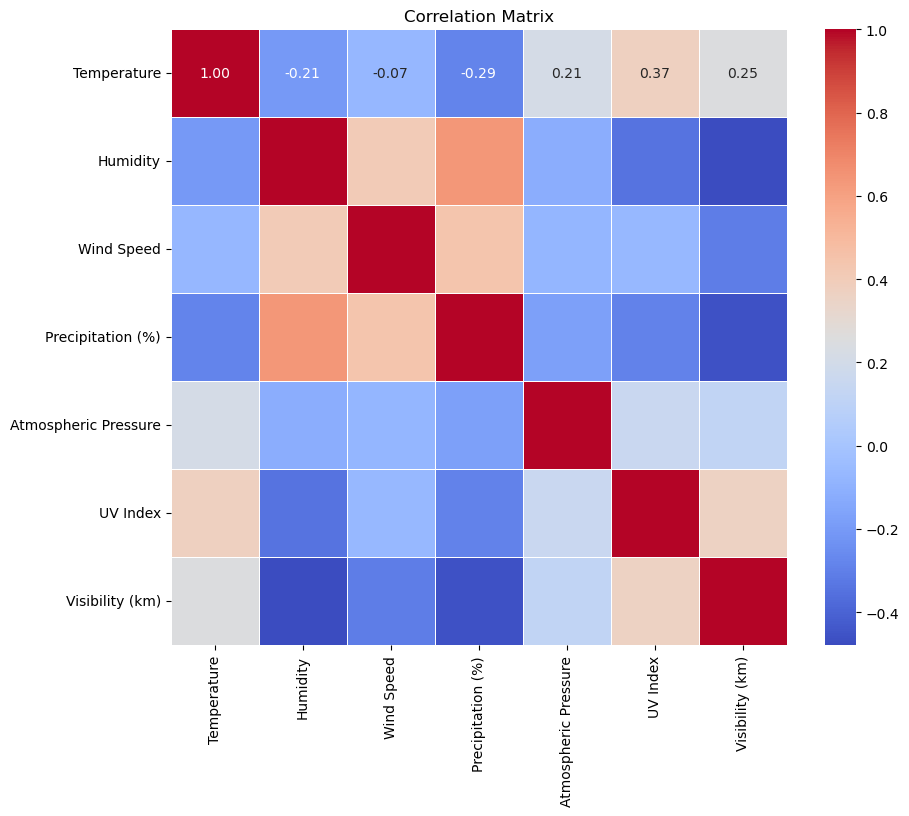

In [ ]:
corr_matrix = data.corr()

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Menampilkan Kolom yang ada pada dataset

In [ ]:
data.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [ ]:
WEATHER_LABELS = data["Weather Type"].unique()
WEATHER_LABELS

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

Merubah Data Kategorikal menjadi Numeric

In [ ]:
encoder = LabelEncoder()

data['Weather Type'] = encoder.fit_transform(data['Weather Type'])

In [ ]:
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,1
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,0
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,3
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,3
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,1


Splitting the dataset

Memisahkan fitur (X) dan target (y) dari dataset.

In [ ]:
X = data.drop('Weather Type', axis=1)
y = data['Weather Type']

Membagi data menjadi set pelatihan dan set pengujian dengan proporsi 80-20.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)

In [ ]:
for feature in categorical_columns:
    X_train[feature] = encoder.fit_transform(X_train[feature])
    X_test[feature] = encoder.transform(X_test[feature])

In [ ]:
X_train.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
6244,25.0,26,6.0,1.0,3,1017.89,10,2,6.5,2
371,-7.0,85,2.0,99.0,3,993.79,0,3,2.5,1
2173,20.0,48,4.5,17.0,0,1014.45,6,3,7.5,2
10581,30.0,73,18.0,78.0,2,1015.78,3,2,1.5,2
8885,12.0,68,2.0,43.0,3,1012.36,2,1,5.5,1


Melakukan standardisasi fitur dengan menggunakan StandardScaler.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train[numerical_columns])

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

scaler.fit(X_test[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

Neural Network

Membangun model neural network

In [ ]:
model = Sequential([
    Dense(units=512, input_dim=10, activation="relu"),
    Dropout(0.3),
    Dense(units=128, activation="relu"),
    Dropout(0.3),
    Dense(units=64, activation="relu"),
    Dropout(0.3),
    Dense(units=32, activation="relu"),
    Dropout(0.3),
    Dense(units=4, activation='softmax')
])

c:\Users\sapyy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mengkompilasi model dengan optimizer Adam dan loss function categorical crossentropy.

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001) , loss="sparse_categorical_crossentropy" , metrics=['accuracy'])

Melatih model menggunakan data pelatihan dan validasi dengan 100 epochs.

In [ ]:
history = model.fit(np.array(X_train) , np.array(y_train) , validation_data=(np.array(X_test), np.array(y_test)) , epochs=100)

Epoch 1/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6471 - loss: 0.8496 - val_accuracy: 0.8826 - val_loss: 0.2975
Epoch 2/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8811 - loss: 0.3402 - val_accuracy: 0.8996 - val_loss: 0.2515
Epoch 3/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8937 - loss: 0.2854 - val_accuracy: 0.8977 - val_loss: 0.2264
Epoch 4/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9023 - loss: 0.2422 - val_accuracy: 0.9011 - val_loss: 0.2266
Epoch 5/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9021 - loss: 0.2435 - val_accuracy: 0.9057 - val_loss: 0.2043
Epoch 6/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9029 - loss: 0.2301 - val_accuracy: 0.9027 - val_loss: 0.2136
Epoch 7/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9092 - loss: 0.2113 - val_accuracy: 0.9061 - val_loss: 0.2015
Epoch 8/100
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9018 - loss: 0.2149 - val_accu

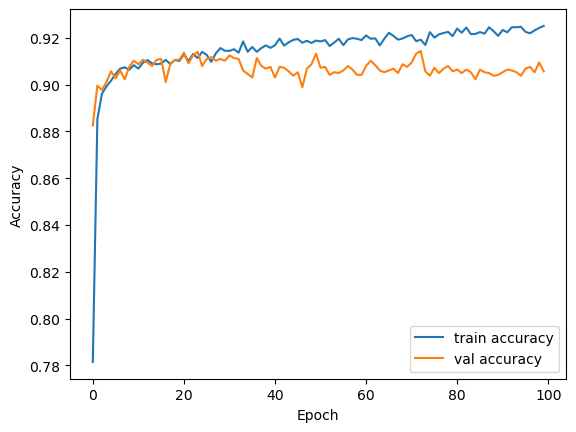

In [ ]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

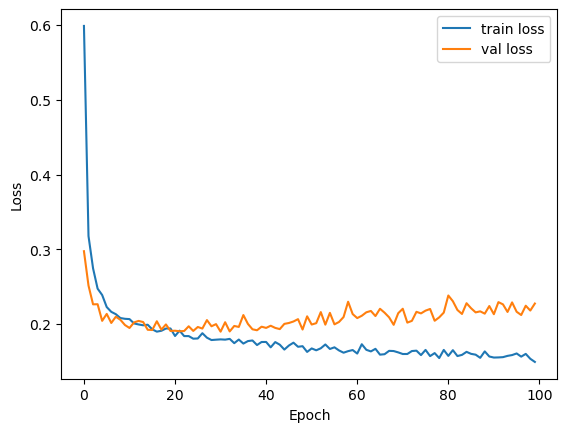

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Melakukan prediksi pada set pengujian dan mengubah hasil prediksi menjadi kelas.

In [ ]:
y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Membuat dan menampilkan confusion matrix untuk hasil prediksi.

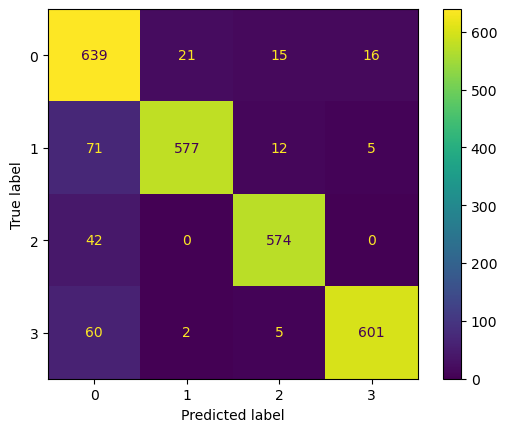

In [ ]:
c_m  = confusion_matrix(y_test , y_pred_classes)
conf_matrix = ConfusionMatrixDisplay(confusion_matrix = c_m)
conf_matrix.plot()
plt.show()

Rainy: 1
cloudy: 0
Sunny: 3
Snowy: 2

**Kesimpulan**


Proyek klasifikasi cuaca ini berhasil mengembangkan model pembelajaran mesin yang mampu mengklasifikasikan kondisi cuaca berdasarkan data meteorologi. Model ini dilatih dengan menggunakan berbagai teknik pemrosesan data dan algoritma klasifikasi, seperti Keras dan TensorFlow. Setelah melalui tahap pelatihan dan evaluasi, model ini mencapai akurasi sekitar 90% dalam mengklasifikasikan kondisi cuaca menjadi cerah, berawan, hujan, atau badai. Evaluasi model menggunakan metrik seperti akurasi dan confusion matrix menunjukkan bahwa model ini mampu memberikan prediksi yang akurat.

Dengan akurasi yang dicapai, model ini menunjukkan potensi besar dalam meningkatkan pemantauan dan analisis cuaca, mendukung sistem peringatan dini untuk cuaca ekstrem, dan menerapkan teknologi ini di berbagai sektor seperti pertanian, penerbangan, transportasi, dan energi. Secara keseluruhan, proyek ini telah berhasil mengatasi tantangan dalam pengolahan data meteorologi dan variabilitas cuaca, menghasilkan model yang andal dan berguna untuk berbagai aplikasi praktis.